In [2]:
# Import packages
from google.colab import drive
import pandas as pd # package for reading in and manipulating data
from datetime import datetime # package for manipulating dates
from sklearn.model_selection import train_test_split # package for splitting data


drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/weatherMY') # add the directory containing utils.py to the path

import pandas as pd # package for reading in and manipulating data
from datetime import datetime # package for manipulating dates

print('All packages imported successfully!')

Mounted at /content/drive
All packages imported successfully!


In [3]:
import utils # utils functions defined for this lab
import tensorflow.keras as keras


# EDA

In [4]:
raw_data1 = pd.read_csv('/content/drive/MyDrive/weatherMY/weatherMY.csv')
raw_data1.drop(columns=['Unnamed: 0'], inplace=True)


In [5]:
raw_data1.head()

,datetime,location,pollutant_value,pollutant_symbol
0,2023-04-21 11:00:00,Seremban,102.0,**
1,2023-04-21 19:00:00,Seremban,124.0,**
2,2023-04-21 21:00:00,Seremban,99.0,**
3,2023-04-21 20:00:00,Kuala Terengganu,120.0,**
4,2023-04-21 08:00:00,Kimanis,43.0,**


In [6]:
indic = pd.read_csv('/content/drive/MyDrive/weatherMY/air_quality_indicators.csv')
indic.rename(columns={'symbol': 'pollutant_symbol'}, inplace=True)

indic.head(10)

,pollutant,pollutant_symbol,meaning,unit
0,PM2.5,**,Particulate matter with diameter of less than ...,μg/m3
1,PM10,*,Particulate matter with diameter of less than ...,μg/m3
2,SO2,a,Sulphur Dioxide,ppm
3,NO2,b,Nitrogen Dioxide,ppm
4,O3,c,Ozone,ppm
5,CO,d,Carbon Monoxide,ppm
6,multi-pollutant,&,More than one pollutant,NaN
7,Unidentified,-,NaN,NaN


In [7]:
stations = pd.read_csv('/content/drive/MyDrive/weatherMY/full_locations.csv')
stations.rename(columns={'identifying_location': 'Station','latitude':'Latitude','longitude':'Longitude'}, inplace=True)
stations.head(10)

,Station,place,city,state,Latitude,Longitude,ICAO,PWStation
0,Muar,Taman Sungai Abong,Muar,Johor,2.063100,102.584900,NaN,NaN
1,Jalan Muar-Pagoh,Pagoh,Muar,Johor,2.139035,102.739549,NaN,IPAGOH1
2,Senai International Airport,Bandar Putra Kulai,Kulai,Johor,1.640556,103.670278,WMKJ,NaN
3,Kampung Baru Kulai,Taman Kulai Besar,Kulai,Johor,1.654704,103.602386,NaN,IKULAI5
4,Kluang,Kluang,Kluang,Johor,2.037882,103.312063,NaN,NaN
5,Larkin,Kampung Datok Onn Larkin,Larkin,Johor,1.494625,103.735975,NaN,NaN
6,Mersing Airport,Mersing,Mersing,Johor,2.383333,103.859444,WMAU,NaN
7,Segamat,Kampung Sedeng,Segamat,Johor,2.493914,102.862694,NaN,NaN
8,Jalan Muar-Segamat,Sime Darby Plantation Ladang Tangkak,Tangkak,Johor,2.294794,102.571595,NaN,ITANGK1
9,Kampung Payamas,Tangkak,Tangkak,Johor,2.319756,102.518743,NaN,ITANGK1


In [8]:
print(stations.nunique())

Station      177
place        154
city          89
state         16
Latitude     166
Longitude    166
ICAO          26
PWStation     55
dtype: int64


In [9]:
raw_data1 = pd.merge(raw_data1, indic[["pollutant","pollutant_symbol"]], on='pollutant_symbol')
raw_data1.head(10000)

,datetime,location,pollutant_value,pollutant_symbol,pollutant
0,2023-04-21 11:00:00,Seremban,102.0,**,PM2.5
1,2023-04-21 19:00:00,Seremban,124.0,**,PM2.5
2,2023-04-21 21:00:00,Seremban,99.0,**,PM2.5
3,2023-04-21 20:00:00,Kuala Terengganu,120.0,**,PM2.5
4,2023-04-21 08:00:00,Kimanis,43.0,**,PM2.5
...,...,...,...,...,...
9995,2021-12-10 15:00:00,Kimanis,19.0,**,PM2.5
9996,2021-11-13 14:00:00,Kimanis,19.0,**,PM2.5
9997,2021-10-19 22:00:00,Kuching,19.0,**,PM2.5
9998,2022-01-08 02:00:00,Kuching,19.0,**,PM2.5


In [10]:
raw_data1.nunique()

,0
datetime,39775
location,79
pollutant_value,192
pollutant_symbol,7
pollutant,7


In [11]:
indic.head(10)

,pollutant,pollutant_symbol,meaning,unit
0,PM2.5,**,Particulate matter with diameter of less than ...,μg/m3
1,PM10,*,Particulate matter with diameter of less than ...,μg/m3
2,SO2,a,Sulphur Dioxide,ppm
3,NO2,b,Nitrogen Dioxide,ppm
4,O3,c,Ozone,ppm
5,CO,d,Carbon Monoxide,ppm
6,multi-pollutant,&,More than one pollutant,NaN
7,Unidentified,-,NaN,NaN


In [12]:
import pandas as pd

# Original DataFrame
df = raw_data1.copy()

# Convert the datetime column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Pivot the DataFrame
df_pivot = df.pivot(index=['datetime', 'location'], columns='pollutant', values='pollutant_value').reset_index()

# Flatten the column names
df_pivot.columns.name = None

# Display the final DataFrame
print(df_pivot)



                   datetime            location  CO  NO2  O3  PM10  PM2.5  \
0       2020-01-01 01:00:00          Alor Gajah NaN  NaN NaN   NaN   22.0   
1       2020-01-01 01:00:00          Alor Setar NaN  NaN NaN   NaN   27.0   
2       2020-01-01 01:00:00         Balik Pulau NaN  NaN NaN   NaN   53.0   
3       2020-01-01 01:00:00  Balok Baru Kuantan NaN  NaN NaN   NaN   29.0   
4       2020-01-01 01:00:00    Bandaraya Melaka NaN  NaN NaN   NaN   37.0   
...                     ...                 ...  ..  ...  ..   ...    ...   
2665886 2024-08-31 00:00:00             Tangkak NaN  NaN NaN   NaN   62.0   
2665887 2024-08-31 00:00:00       Tanjung Malim NaN  NaN NaN   NaN    NaN   
2665888 2024-08-31 00:00:00          Tasek Ipoh NaN  NaN NaN   NaN   69.0   
2665889 2024-08-31 00:00:00               Tawau NaN  NaN NaN   NaN   37.0   
2665890 2024-08-31 00:00:00            Temerloh NaN  NaN NaN   NaN   59.0   

         SO2  multi-pollutant  
0        NaN              NaN  
1        Na

In [13]:
df_pivot.describe()

,datetime,CO,NO2,O3,PM10,PM2.5,SO2,multi-pollutant
count,2665891,4.000000,293.000000,14408.000000,2532.000000,2.643202e+06,467.000000,4985.000000
mean,2022-05-14 03:03:06.816040448,21.250000,27.071672,30.805733,33.796603,4.694644e+01,65.154176,21.729188
min,2020-01-01 01:00:00,14.000000,9.000000,10.000000,8.000000,6.000000e+00,16.000000,7.000000
25%,2021-03-15 20:00:00,14.750000,17.000000,20.000000,19.000000,3.400000e+01,49.000000,15.000000
50%,2022-05-23 19:00:00,21.000000,20.000000,25.000000,29.000000,5.000000e+01,61.000000,19.000000
75%,2023-07-13 05:00:00,27.500000,27.000000,32.000000,43.000000,5.700000e+01,76.000000,25.000000
max,2024-08-31 00:00:00,29.000000,103.000000,151.000000,117.000000,2.070000e+02,174.000000,90.000000
std,NaN,7.847505,19.399327,19.128611,20.056009,1.623589e+01,25.626439,10.719898


In [14]:
print(df_pivot.duplicated().sum())

0


In [15]:
print(len(df_pivot))

2665891


In [16]:
print(df_pivot.isna().sum())

datetime                 0
location                 0
CO                 2665887
NO2                2665598
O3                 2651483
PM10               2663359
PM2.5                22689
SO2                2665424
multi-pollutant    2660906
dtype: int64


In [17]:
df_new = df_pivot[df_pivot['datetime'].dt.year == 2024]
print(df_new.head())
print(df_new.isna().sum())

          datetime            location  CO  NO2  O3  PM10  PM2.5  SO2  \
2275902 2024-01-01          Alor Gajah NaN  NaN NaN   NaN   39.0  NaN   
2275903 2024-01-01          Alor Setar NaN  NaN NaN   NaN   34.0  NaN   
2275904 2024-01-01         Balik Pulau NaN  NaN NaN   NaN   53.0  NaN   
2275905 2024-01-01  Balok Baru Kuantan NaN  NaN NaN   NaN   52.0  NaN   
2275906 2024-01-01    Bandaraya Melaka NaN  NaN NaN   NaN   37.0  NaN   

         multi-pollutant  
2275902              NaN  
2275903              NaN  
2275904              NaN  
2275905              NaN  
2275906              NaN  
datetime                0
location                0
CO                 389989
NO2                389978
O3                 388781
PM10               389601
PM2.5                2109
SO2                389892
multi-pollutant    389584
dtype: int64


In [18]:
pollutants_list = ['PM2.5', 'PM10',  'CO', 'NO2', 'O3','SO2','multi-pollutant']


In [19]:
#Fully populate datetime:

# Assuming the original DataFrame is named 'df'
df = df_new.copy()
# Convert the datetime column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Create a date range for the datetime column with hourly intervals
date_range = pd.date_range(start=df['datetime'].min(), end=df['datetime'].max(), freq='H')

# Use a cross join to combine date_range with unique locations
locations = df['location'].unique()
full_index = pd.MultiIndex.from_product([date_range, locations], names=['datetime', 'location'])

# Reindex the original DataFrame to this full index
df_full = df.set_index(['datetime', 'location']).reindex(full_index).reset_index()

# Display the final DataFrame
print(df_full.head())



    datetime            location  CO  NO2  O3  PM10  PM2.5  SO2  \
0 2024-01-01          Alor Gajah NaN  NaN NaN   NaN   39.0  NaN   
1 2024-01-01          Alor Setar NaN  NaN NaN   NaN   34.0  NaN   
2 2024-01-01         Balik Pulau NaN  NaN NaN   NaN   53.0  NaN   
3 2024-01-01  Balok Baru Kuantan NaN  NaN NaN   NaN   52.0  NaN   
4 2024-01-01    Bandaraya Melaka NaN  NaN NaN   NaN   37.0  NaN   

   multi-pollutant  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  


In [20]:
df_full.head(1000)


,datetime,location,CO,NO2,O3,PM10,PM2.5,SO2,multi-pollutant
0,2024-01-01 00:00:00,Alor Gajah,NaN,NaN,NaN,NaN,39.0,NaN,NaN
1,2024-01-01 00:00:00,Alor Setar,NaN,NaN,NaN,NaN,34.0,NaN,NaN
2,2024-01-01 00:00:00,Balik Pulau,NaN,NaN,NaN,NaN,53.0,NaN,NaN
3,2024-01-01 00:00:00,Balok Baru Kuantan,NaN,NaN,NaN,NaN,52.0,NaN,NaN
4,2024-01-01 00:00:00,Bandaraya Melaka,NaN,NaN,NaN,NaN,37.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,2024-01-01 13:00:00,Sungai Petani,NaN,NaN,NaN,NaN,39.0,NaN,NaN
996,2024-01-01 13:00:00,Taiping,NaN,NaN,NaN,NaN,53.0,NaN,NaN
997,2024-01-01 13:00:00,Tanah Merah,NaN,NaN,NaN,NaN,49.0,NaN,NaN
998,2024-01-01 13:00:00,Tangkak,NaN,NaN,NaN,NaN,38.0,NaN,NaN


In [21]:
raw_data = df_new.copy()
# Modify the DateTime column format
#raw_data['datetime'] = pd.to_datetime(utils.fix_dates(raw_data, 'datetime'), dayfirst=True)
# Rename "OZONO" column from Spanish to English
raw_data = raw_data.rename(columns={'location': 'Station'})
raw_data = raw_data.rename(columns={'datetime': 'DateTime'})


# Print out the number of lines in the dataframe
print(f"The dataset contains {len(raw_data)} entries")

# Print out the first few lines in the dataframe
raw_data.head(5)

The dataset contains 389989 entries


,DateTime,Station,CO,NO2,O3,PM10,PM2.5,SO2,multi-pollutant
2275902,2024-01-01,Alor Gajah,NaN,NaN,NaN,NaN,39.0,NaN,NaN
2275903,2024-01-01,Alor Setar,NaN,NaN,NaN,NaN,34.0,NaN,NaN
2275904,2024-01-01,Balik Pulau,NaN,NaN,NaN,NaN,53.0,NaN,NaN
2275905,2024-01-01,Balok Baru Kuantan,NaN,NaN,NaN,NaN,52.0,NaN,NaN
2275906,2024-01-01,Bandaraya Melaka,NaN,NaN,NaN,NaN,37.0,NaN,NaN


In [22]:
# Print out a count of null values for each column in the dataset
raw_data.isnull().sum()

,0
DateTime,0
Station,0
CO,389989
NO2,389978
O3,388781
PM10,389601
PM2.5,2109
SO2,389892
multi-pollutant,389584


In [23]:
# Define a number of bins to use (feel free to changes this and see what happens!)
number_of_bins=64

# Generate histograms
utils.create_histogram_plot(raw_data, number_of_bins)


interactive(children=(Dropdown(description='Station', options=('Alor Gajah', 'Alor Setar', 'Balik Pulau', 'Bal…

In [24]:
# Generate boxplots of pollutant values for each sensor station
utils.create_boxplot(raw_data)

interactive(children=(Dropdown(description='Pollutant', options=('PM2.5', 'PM10', 'CO', 'NO2', 'O3', 'SO2', 'm…

interactive(children=(Dropdown(description='X-Axis', options=('PM2.5', 'PM10', 'CO', 'NO2', 'O3', 'SO2', 'mult…

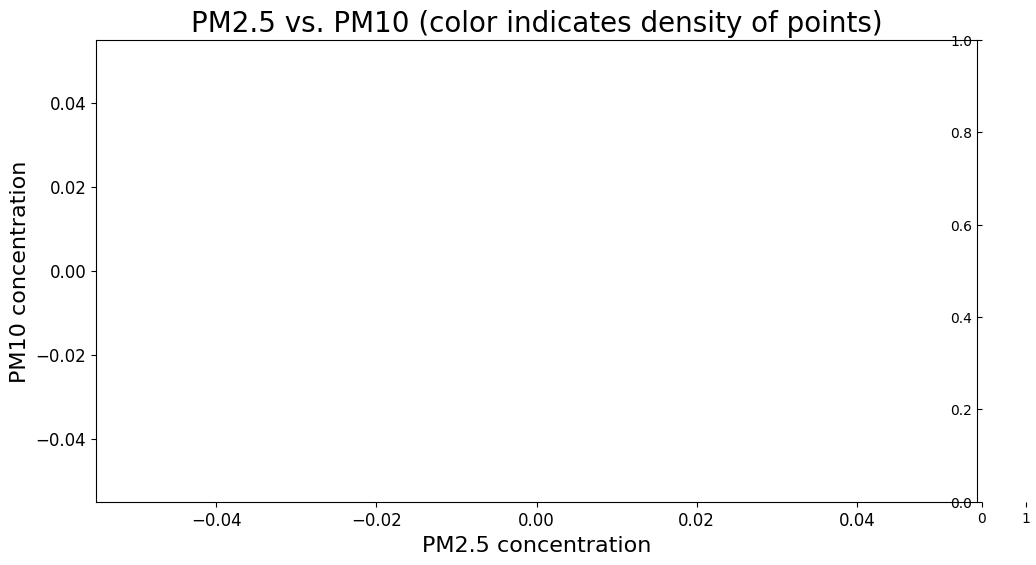

In [25]:
# Generate scatterplots of different pollutants against one another
# Different colors show various densities of points on the plot
utils.create_scatterplot(raw_data)

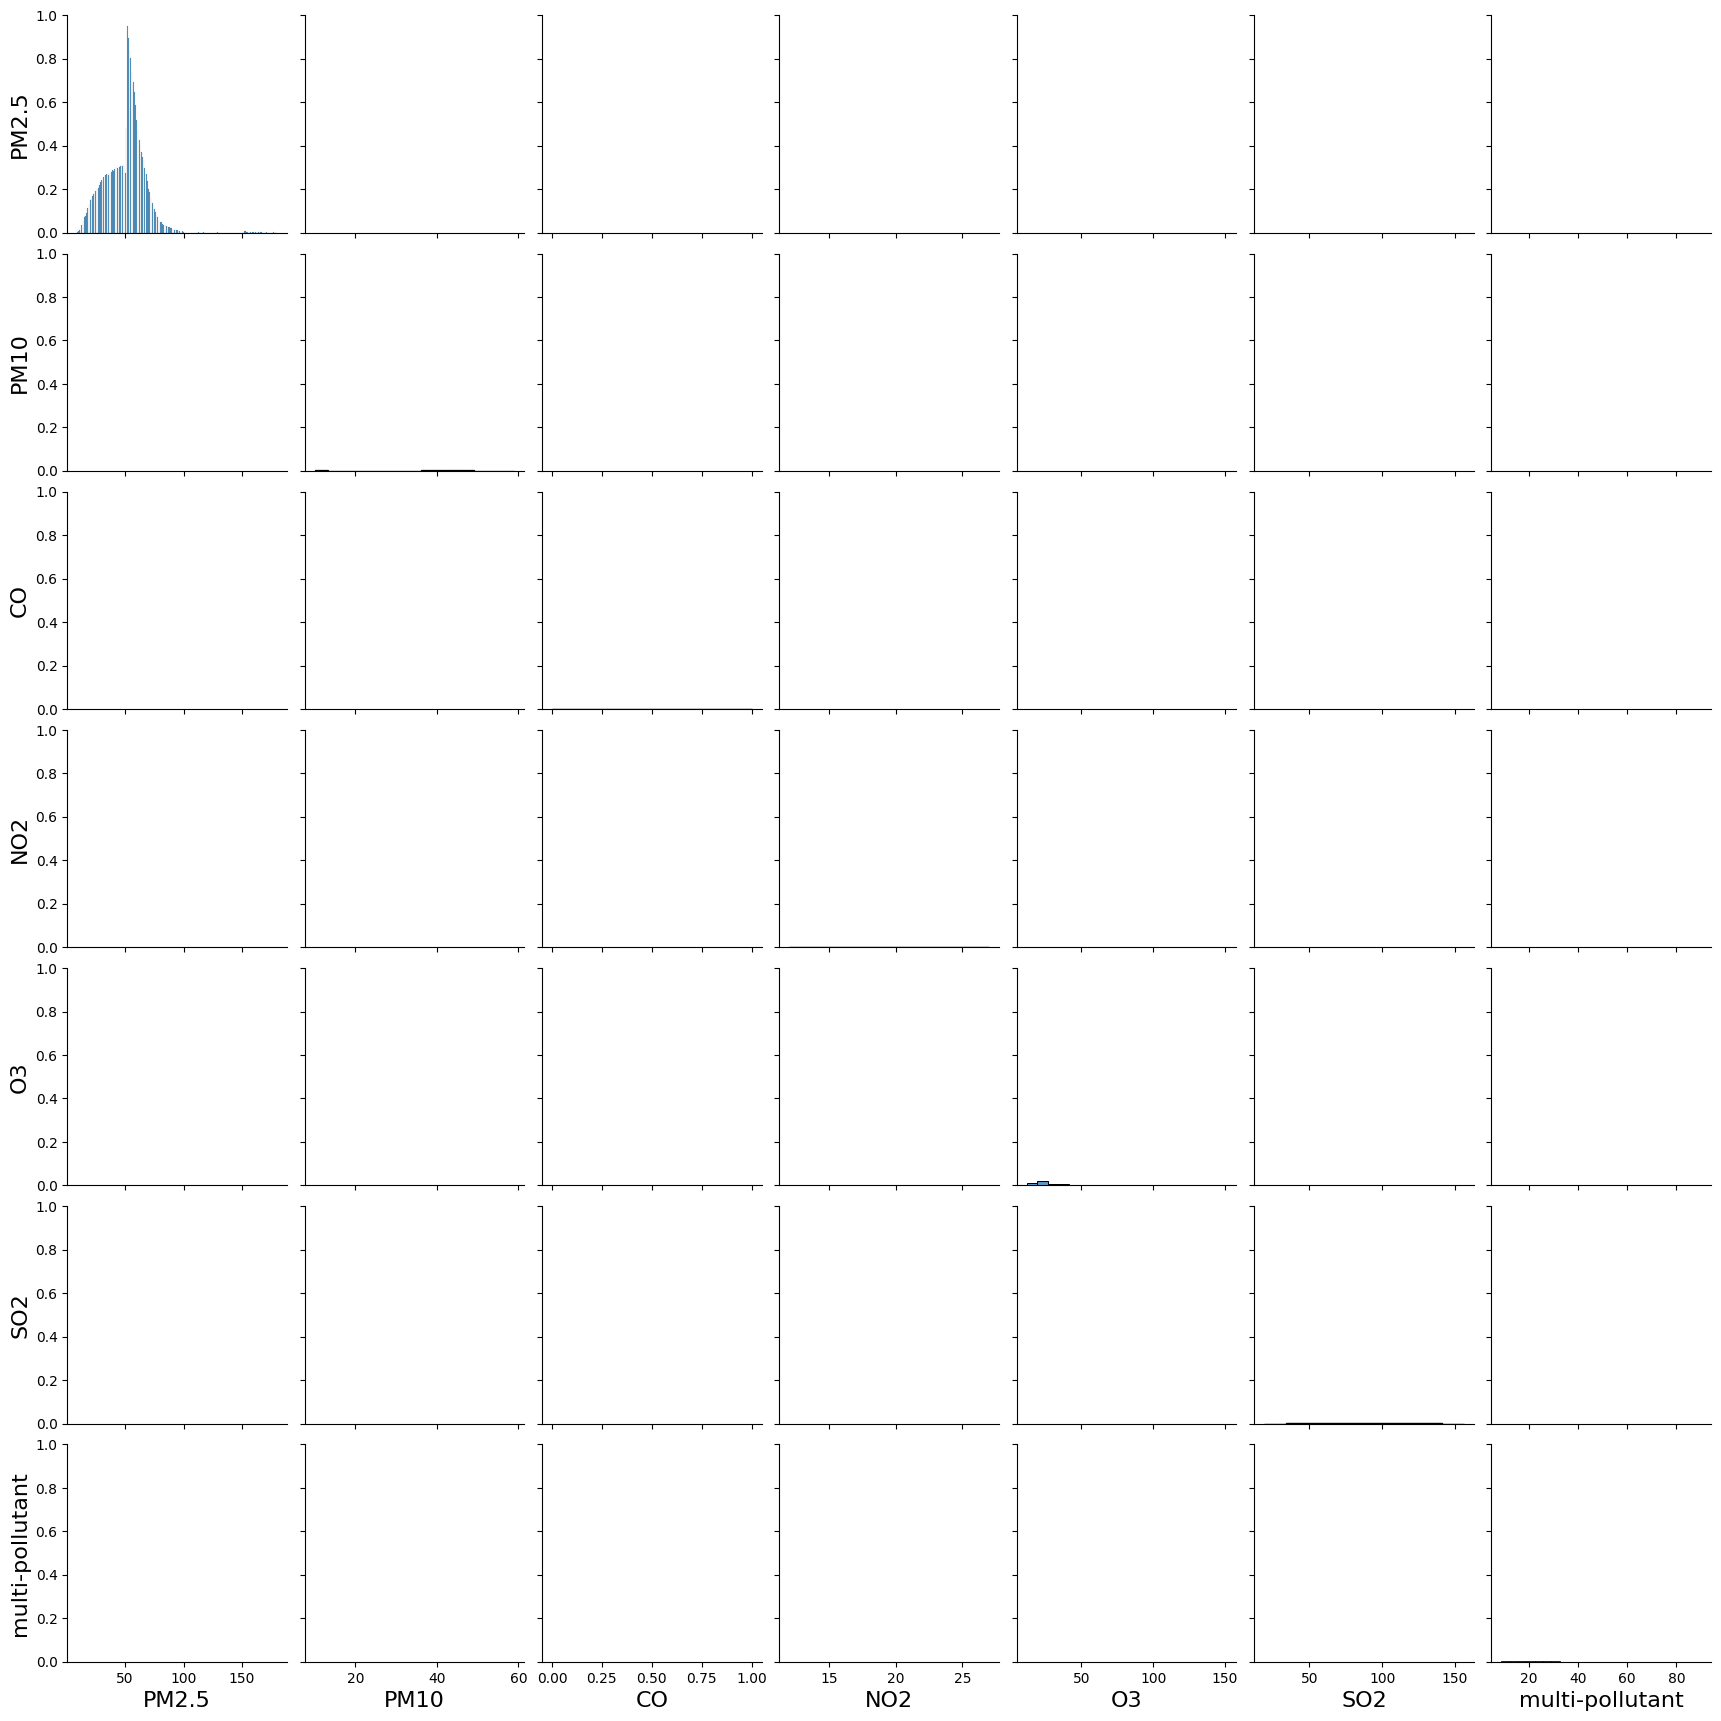

In [26]:
# generate a grid of histograms and scatterplots of your data
utils.plot_pairplot(raw_data, pollutants_list)

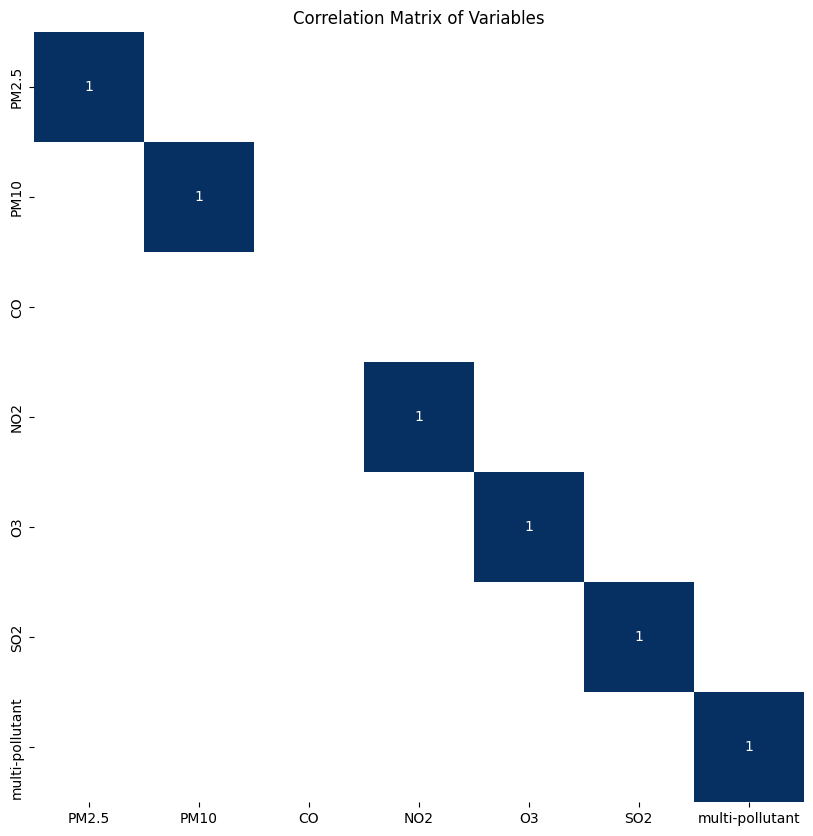

In [27]:
# generate a correlation matrix
utils.create_correlation_matrix(raw_data, pollutants_list)

In [28]:
# define the date range to show in the plot
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 1, 31)
# generate a time series plot of pollutant data for a paricular station
utils.create_time_series_plot(raw_data, start_date, end_date)

interactive(children=(Dropdown(description='Station', options=('Alor Gajah', 'Alor Setar', 'Balik Pulau', 'Bal…

In [29]:
# add some extra features like latitude and longitude to the data for mapping
enriched_raw_data = utils.add_extra_features(raw_data)

# choose a variable to calculate long-term averages for
x_variable = 'hour_of_day' # Options ['day_of_week', 'hour_of_day']
# choose a pollutant which you are interested in
y_variable = 'PM2.5' # Options ['PM2.5', 'PM10', 'NO', 'NO2', 'NOX', 'CO', 'OZONE']

# generate a map representation of the data
utils.create_map_with_plots(enriched_raw_data, x_variable, y_variable)

/content/drive/MyDrive/weatherMY/utils.py:337: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grouped_means[index[0]][index[1]] = row[0]
/content/drive/MyDrive/weatherMY/utils.py:338: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grouped_stds[index[0]][index[1]] = row[1]


<Figure size 640x480 with 0 Axes>

In [30]:
print(df_new.isna().sum())

datetime                0
location                0
CO                 389989
NO2                389978
O3                 388781
PM10               389601
PM2.5                2109
SO2                389892
multi-pollutant    389584
dtype: int64


In [31]:
import pandas as pd

# Assuming your DataFrame is named `df_pivot` and has a 'datetime' column and column 'X'
# And assuming `pollutants_list` contains the list of columns you want to check

# Step 1: Ensure the datetime column is in datetime format
df_pivot['datetime'] = pd.to_datetime(df_pivot['datetime'])

# Step 2: Extract the month and year from the datetime column
df_pivot['month'] = df_pivot['datetime'].dt.month
df_pivot['year'] = df_pivot['datetime'].dt.year

# Step 3: Loop through each pollutant in the pollutants list
for X in pollutants_list:
    # Group by year and month and count the number of NaN values in column X
    nan_count_per_month_year = df_pivot.groupby(['year', 'month'])[X].apply(lambda x: x.isna().sum())

    # Step 4: Identify the month and year with the least number of NaN values
    month_year_with_least_nans = nan_count_per_month_year.idxmin()
    least_nans_count = nan_count_per_month_year.min()

    # Display the results
    print(f"The month and year with the least NaN values in column {X} is {month_year_with_least_nans}, with {least_nans_count} NaN values.")


The month and year with the least NaN values in column PM2.5 is (2023, 8), with 53 NaN values.
The month and year with the least NaN values in column PM10 is (2020, 9), with 38976 NaN values.
The month and year with the least NaN values in column CO is (2020, 9), with 38997 NaN values.
The month and year with the least NaN values in column NO2 is (2020, 9), with 38997 NaN values.
The month and year with the least NaN values in column O3 is (2020, 9), with 38865 NaN values.
The month and year with the least NaN values in column SO2 is (2020, 9), with 38992 NaN values.
The month and year with the least NaN values in column multi-pollutant is (2020, 9), with 38941 NaN values.


# Modeling

In [32]:
from sklearn.model_selection import train_test_split # package for splitting data


In [33]:
raw_data_enriched = pd.merge(raw_data, stations[['Station','Latitude','Longitude']], on='Station', how='inner')
raw_data_enriched.head(5)

,DateTime,Station,CO,NO2,O3,PM10,PM2.5,SO2,multi-pollutant,Latitude,Longitude
0,2024-01-01 00:00:00,Alor Gajah,NaN,NaN,NaN,NaN,39.0,NaN,NaN,2.370925,102.224592
1,2024-01-01 01:00:00,Alor Gajah,NaN,NaN,NaN,NaN,40.0,NaN,NaN,2.370925,102.224592
2,2024-01-01 02:00:00,Alor Gajah,NaN,NaN,NaN,NaN,39.0,NaN,NaN,2.370925,102.224592
3,2024-01-01 03:00:00,Alor Gajah,NaN,NaN,NaN,NaN,38.0,NaN,NaN,2.370925,102.224592
4,2024-01-01 04:00:00,Alor Gajah,NaN,NaN,NaN,NaN,38.0,NaN,NaN,2.370925,102.224592


In [34]:
# Print out a count of missing data for each column in the dataset
raw_data_enriched.isnull().sum()

,0
DateTime,0
Station,0
CO,387184
NO2,387173
O3,385985
PM10,386796
PM2.5,2098
SO2,387088
multi-pollutant,386780
Latitude,0


In [42]:
import pandas as pd
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Example DataFrame of stations with latitude and longitude

# Coordinates of Petaling Jaya
pj_lat = 3.1952276146578398
pj_lon = 101.55186799816333

# Calculate distance to Petaling Jaya for each station
raw_data_enriched['distance_to_pj'] = raw_data_enriched.apply(lambda row: haversine(pj_lat, pj_lon, row['Latitude'], row['Longitude']), axis=1)

df_unique = raw_data_enriched.sort_values('distance_to_pj').drop_duplicates('Station')

# Find the 5 closest stations
closest_stations = df_unique.nsmallest(5, 'distance_to_pj')

# Display the results
print(closest_stations[['Station', 'Latitude', 'Longitude', 'distance_to_pj']])



                    Station  Latitude   Longitude  distance_to_pj
248296        Petaling Jaya  3.133169  101.608011        9.299051
320460            Shah Alam  3.104717  101.556222       10.075924
38367             Batu Muda  3.212439  101.682228       14.598705
91907   Johan Setia (MCAQM)  2.979750  101.481790       25.191793
124769                Klang  3.014889  101.413111       25.287744


In [46]:
closest_stations.count()

,0
DateTime,5
Station,5
PM2.5,5
Latitude,5
Longitude,5
distance_to_pj,5


In [35]:
# Plot a time series for a particular date range, pollutant, and sensor station
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 1, 31)
utils.create_time_series_plot(raw_data, start_date, end_date)

interactive(children=(Dropdown(description='Station', options=('Alor Gajah', 'Alor Setar', 'Balik Pulau', 'Bal…

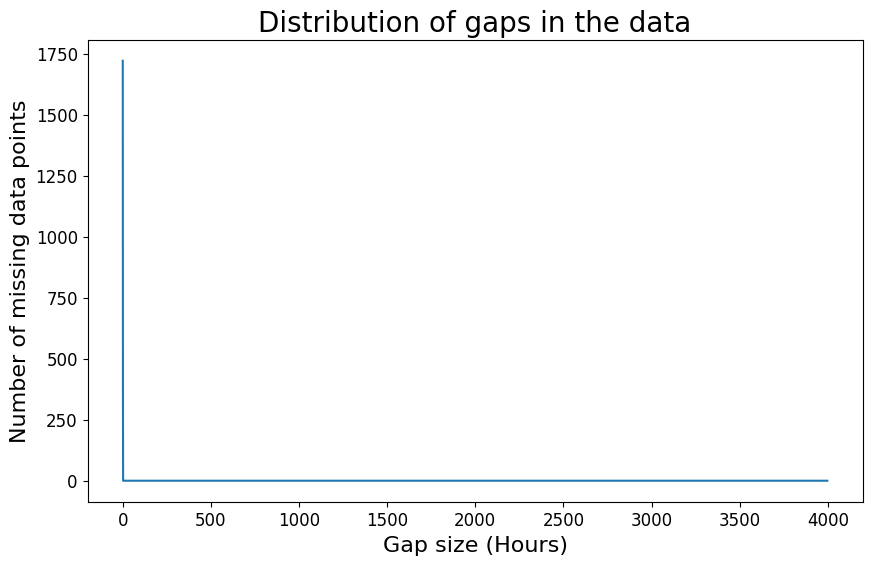

In [36]:
# Plot the distribution of gap sizes in the data
utils.plot_distribution_of_gaps(raw_data, target='PM2.5')

In [37]:
# Specify the date to plot
day = datetime(2024, 5, 6)

# Create a plot to display the linear interpolation for a range of hours
utils.visualize_missing_values_estimation(raw_data_enriched, day);

interactive(children=(Dropdown(description='Station', options=('Alor Gajah', 'Alor Setar', 'Balik Pulau', 'Bal…

In [47]:
raw_data_enriched = closest_stations.copy()

In [48]:
raw_data_enriched = raw_data_enriched[['DateTime', 'Station','PM2.5', 'Latitude', 'Longitude']]

In [49]:
# Create a nearest neighbor model and run it on your test data
regression_scores = {}
regression_scores['baseline_model'] = utils.calculate_mae_for_nearest_station(raw_data_enriched, target='PM2.5')
print(regression_scores['baseline_model'])

{'MAE': 11.0}


In [ ]:
# Define the variable you want to predict
target = 'PM2.5'

# Create new columns for day of week and hour of day
raw_data_for_imputing = raw_data_enriched.copy()
raw_data_for_imputing['day_week'] = pd.DatetimeIndex(raw_data_for_imputing['DateTime']).weekday
raw_data_for_imputing['hour'] = pd.DatetimeIndex(raw_data_for_imputing['DateTime']).hour

# Create a numerical representation of station ID and add as extra columns to the dataframe
one_hot = pd.get_dummies(raw_data_for_imputing.Station, prefix='Station')
raw_data_for_imputing = raw_data_for_imputing.join(one_hot)

# Make a copy of the dataframe before dropping rows with missing values
data_no_missing = raw_data_for_imputing.copy()
# Drop all rows containing missing values
data_no_missing.dropna(inplace=True)
# Print out the number of missing values in the PM2.5 column as a check (should print 0)
null_remaining = data_no_missing[target].isnull().sum()
if null_remaining == 0:
    print('missing values removed and data prepared successfully!')

In [ ]:
len(data_no_missing)

In [ ]:
train_data, test_data = train_test_split(data_no_missing, test_size=0.25, random_state=57)

print(f'Train dataset size: {train_data.shape}')
print(f'Test dataset size: {test_data.shape}')

In [ ]:
# Define the features you will base your predictions on
pollutants_list = ['PM10','PM2.5','NO','NO2','NOX','CO','OZONE']
pollutants_except_target = [i for i in pollutants_list if i != target]
#feature_names = ['day_week', 'hour'] + list(one_hot.columns) + pollutants_except_target
feature_names = ['day_week', 'hour'] + list(one_hot.columns)

# Define the neural network model architecture
model = utils.build_keras_model(input_size=len(feature_names))

# Train and test the model
model, scaler, mae = utils.train_and_test_model(feature_names, target, train_data, test_data, model)
regression_scores['neural_network_model'] = mae

In [ ]:
model